# Q: Which tournaments have the most matches?
### Analysis: The number of matches held in each tournament.


In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

tournament_dataframe = pd.DataFrame()
for file in os.listdir("raw/tournament_parquet"):
    single_stats = pd.read_parquet("raw/tournament_parquet/" + file)
    tournament_dataframe = pd.concat([tournament_dataframe, single_stats], axis= 'rows', ignore_index=True)

tournament_dataframe.head(10)



,match_id,tournament_id,tournament_name,tournament_slug,tournament_unique_id,tournament_category_name,tournament_category_slug,user_count,ground_type,tennis_points,has_event_player_statistics,crowd_sourcing_enabled,has_performance_graph_feature,display_inverse_home_away_teams,priority,competition_type
0,11673958,121441,"Bogota, Colombia",bogota-colombia,None,Challenger,challenger,125,Red clay,125,False,False,False,False,0,2
1,11673962,121441,"Bogota, Colombia",bogota-colombia,None,Challenger,challenger,125,Red clay,125,False,False,False,False,0,2
2,11673963,121441,"Bogota, Colombia",bogota-colombia,None,Challenger,challenger,125,Red clay,125,False,False,False,False,0,2
3,11673993,121451,"Braga, Portugal",braga-portugal,None,Challenger,challenger,163,Red clay,75,False,False,False,False,0,2
4,11674000,121453,"Charleston, USA",charleston-usa,None,Challenger,challenger,71,Hardcourt outdoor,75,False,False,False,False,0,2
5,11674008,121453,"Charleston, USA",charleston-usa,None,Challenger,challenger,71,Hardcourt outdoor,75,False,False,False,False,0,2
6,11674011,121453,"Charleston, USA",charleston-usa,None,Challenger,challenger,71,Hardcourt outdoor,75,False,False,False,False,0,2
7,11674026,121456,"Orleans, France",orleans-france,None,Challenger,challenger,181,Hardcourt indoor,125,False,False,False,False,0,2
8,11674032,121456,"Orleans, France",orleans-france,None,Challenger,challenger,181,Hardcourt indoor,125,False,False,False,False,0,2
9,11674034,121456,"Orleans, France",orleans-france,None,Challenger,challenger,181,Hardcourt indoor,125,False,False,False,False,0,2


In [3]:
# گروه‌بندی بر اساس تورنمنت و شمارش تعداد مسابقات
tournament_counts = tournament_dataframe.groupby(['tournament_id', 'tournament_name']).count()['match_id'].reset_index()

# مرتب‌سازی بر اساس تعداد مسابقات و انتخاب تورنمنت‌هایی با بیشترین مسابقه
tournament_counts = tournament_counts.sort_values(by='match_id', ascending=False)

# نمایش نتایج
print(tournament_counts)


    tournament_id                                    tournament_name  match_id
48         121877         Mendoza, Singles Qualifying, M-ITF-ARG-08A        50
33         121847  Sharm ElSheikh, Singles Qualifying, M-ITF-EGY-16A        49
43         121868        Monastir, Singles Qualifying, M-ITF-TUN-46A        48
0          119387          Osijek, Singles Qualifying, W-ITF-CRO-01B        38
30         121843      Pazardzhik, Singles Qualifying, M-ITF-BUL-05A        35
40         121860           Reims, Singles Qualifying, W-ITF-FRA-20A        33
28         121840    North Cairns, Singles Qualifying, M-ITF-AUS-10A        32
44         121870        Monastir, Singles Qualifying, W-ITF-TUN-42A        29
9          121644                                     Beijing, China        27
29         121841    North Cairns, Singles Qualifying, W-ITF-AUS-12A        25
34         121850  Bad Waltersdorf, Singles Qualifying, W-ITF-AUT...        25
35         121853  Bad Waltersdorf, Singles Qualifyi

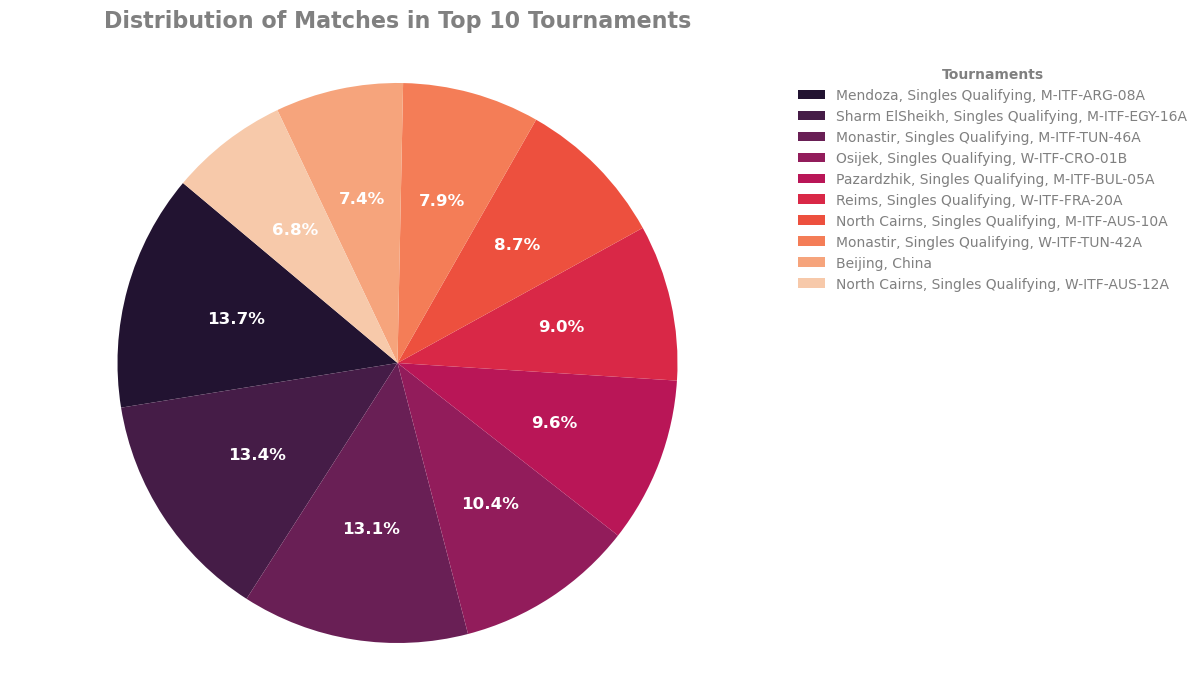

In [5]:

# گروه‌بندی بر اساس تورنمنت و شمارش تعداد مسابقات
tournament_counts = tournament_dataframe.groupby(['tournament_id', 'tournament_name']).count()['match_id'].reset_index()

# انتخاب 10 تورنمنت با بیشترین تعداد مسابقه
top_tournaments = tournament_counts.sort_values(by='match_id', ascending=False).head(10)

# ترسیم نمودار دایره‌ای با استفاده از پالت رنگی plasma
plt.figure(figsize=(10, 8))
colors = sns.color_palette("rocket", len(top_tournaments))

# تابع سفارشی برای رنگ سفید درصدها
def white_percentage(pct):
    return f'{pct:.1f}%'

# ترسیم نمودار دایره‌ای
plt.pie(top_tournaments['match_id'], 
        autopct=white_percentage, startangle=140, colors=colors)

# اضافه کردن عنوان با فاصله بیشتر
plt.title('Distribution of Matches in Top 10 Tournaments', fontsize=16, pad=20, color='gray', fontweight='bold')
plt.axis('equal')  # برای دایره‌ای بودن نمودار

# ایجاد legend و تنظیم رنگ متن به خاکستری
legend = plt.legend(top_tournaments['tournament_name'], title='Tournaments', loc='upper left', bbox_to_anchor=(1, 1), frameon=False)
for text in legend.get_texts():
    text.set_color('gray')  # تغییر رنگ متن به خاکستری
# تغییر رنگ و بولد کردن تیتر legend
legend.get_title().set_color('gray')  # تغییر رنگ تیتر به خاکستری
legend.get_title().set_weight('bold')  # بولد کردن تیتر


# تغییر رنگ و بولد کردن متن درصدها
for text in plt.gca().texts:
    text.set_color('white')  # تغییر رنگ به سفید
    text.set_fontsize(12)    # تنظیم اندازه فونت
    text.set_weight('bold')   # بولد کردن متن

# نمایش نمودار
plt.show()
